# INFO7374 Algorithmic Digital Marketing Fall 2021, Northeastern University

## Project: Global Superstore Marketing Analytics

### Team 3: Sushmitha Jogula - 001546751 and Shreya Bhosale - 001584541

## About the Project

Global Superstore is a leading and one of the largest ecommerce marketplaces connecting businesses across several channels without any hassle. It is considered as one of the best places to advertise, market, purchase and sell goods/properties to genuine individuals. We intend to analyze the sales data of Global Superstore and generate insights about their customers and their behavior based on several factors such as their purchase history, frequency of specific items in their order history, location, shopping price range, payment type etc. This information can be used by the marketing team of Global Superstore to make data-driven decisions generating better profits and revenues to identify best, average and worst customers and the company can create promotional campaigns to attract and retain the customers, to provide product recommendations to customers based on their order history, predict future sales etc.

## Data Preprocessing
Data Preprocessing is the process of making data suitable for use while training a machine learning model. Our dataset initially was not in a ready-to-use state with missing or null values, and hence, we perform different data preprocessing steps to clean our dataset in order to increase the efficiency of our dataset. Our dataset also has several csv files so we aim to create a master dataset file. 

The different steps undertaken here are:
1) Importing the required libraries
2) Loading the dataset csv files
3) Creating a master dataset with all csv files merged
4) Handling missing values and data inconsistencies
5) Creating a Pandas Profiling Report

### Importing the required libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import datetime as dt
from pandas_profiling import ProfileReport
import random
import faker as Faker

### Loading the dataset and creating a master dataset

In [5]:
#Loading products_df and product_category_df

products_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/products.csv')
product_category_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/product_category_name.csv')

In [6]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [7]:
product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [8]:
#combining product_category_df and products_df

products_df = pd.merge(products_df, product_category_df, on='product_category_name', how='left')
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [9]:
#Loading order_items_df and sellers_df

order_items_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/order_items.csv')
sellers_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/sellers.csv')

In [10]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,135.470,17.277
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,459.770,23.582
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,689.977,56.433
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,805.000,47.489
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,229.770,22.035
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,128.777,11.336


In [11]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [12]:
#combining order_items_df and sellers_df

orderitems_sellers_df = pd.merge(order_items_df, sellers_df, on='seller_id', how='left')
orderitems_sellers_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,135.470,17.277,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,459.770,23.582,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,689.977,56.433,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,805.000,47.489,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,229.770,22.035,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,128.777,11.336,4733,sao paulo,SP


In [13]:
#Loading orders_df and order_reviews_df

orders_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/orders.csv')
order_reviews_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/order_reviews.csv')

In [14]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [15]:
#Checking number of unique orders in orders_df
print(len(orders_df['order_id'].unique()))

99441


In [16]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [17]:
#Checking number of unique orders in order_reviews_df
print(len(order_reviews_df['order_id'].unique()))

99441


In [18]:
#Calculating average of review scores for a given order because order_reviews_df contains repeating order_id

avg_review_score = order_reviews_df.groupby(['order_id'])['review_score'].mean()
avg_review_score = pd.DataFrame({'order_id':avg_review_score.index, 'review_score':avg_review_score.values})
print(avg_review_score)

                               order_id  review_score
0      00010242fe8c5a6d1ba2dd792cb16214           5.0
1      00018f77f2f0320c557190d7a144bdd3           4.0
2      000229ec398224ef6ca0657da4fc703e           5.0
3      00024acbcdf0a6daa1e931b038114c75           4.0
4      00042b26cf59d7ce69dfabb4e55b4fd9           5.0
...                                 ...           ...
99436  fffc94f6ce00a00581880bf54a75a037           5.0
99437  fffcd46ef2263f404302a634eb57f7eb           5.0
99438  fffce4705a9662cd70adb13d4a31832d           5.0
99439  fffe18544ffabc95dfada21779c9644f           5.0
99440  fffe41c64501cc87c801fd61db3f6244           5.0

[99441 rows x 2 columns]


In [19]:
#merge avg_review_score with orders_df

orders_df = pd.merge(orders_df, avg_review_score, on='order_id', how='left')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0


In [20]:
#Loading order_payments_df

order_payments_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/order_payments.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,16,228.46
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,2,56.10
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,2,151.13
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,16,247.89
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,4,295.44
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,2,835.61
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,4,222.64
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,2,109.87
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,10,849.94


In [21]:
#adding total payment_values grouped by order_id to remove repeating orders in order_payments_df and get total payment for each order

sum_payment_value = order_payments_df[['order_id','payment_value']].groupby(['order_id'])['payment_value'].sum()
sum_payment_value = pd.DataFrame({'order_id':sum_payment_value.index, 'total_payment':sum_payment_value.values})
print(sum_payment_value)

                               order_id  total_payment
0      00010242fe8c5a6d1ba2dd792cb16214         166.04
1      00018f77f2f0320c557190d7a144bdd3         597.61
2      000229ec398224ef6ca0657da4fc703e         498.80
3      00024acbcdf0a6daa1e931b038114c75          59.29
4      00042b26cf59d7ce69dfabb4e55b4fd9         501.49
...                                 ...            ...
99435  fffc94f6ce00a00581880bf54a75a037         789.82
99436  fffcd46ef2263f404302a634eb57f7eb         889.02
99437  fffce4705a9662cd70adb13d4a31832d         268.76
99438  fffe18544ffabc95dfada21779c9644f         148.83
99439  fffe41c64501cc87c801fd61db3f6244         128.32

[99440 rows x 2 columns]


In [ ]:
#merge sum_payment_value with orders_df

orders_df = pd.merge(orders_df, sum_payment_value, on='order_id', how='left')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,total_payment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,89.04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,325.36
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,411.98
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,166.06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,65.83
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,195.68
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,448.50
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,623.32
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,1014.67


In [23]:
#concatenating payment_type values grouped by order_id to remove repeating orders in order_payments_df

#creating a subset of order_payments_df and not considering other columns
order_payments_df_temp = order_payments_df[['order_id','payment_type']]

grouped_order_payments_df_temp = order_payments_df_temp.groupby("order_id")
grouped_payment_type_list = grouped_order_payments_df_temp["payment_type"].agg(lambda x: ",".join(x))
grouped_payment_type_list = grouped_payment_type_list.reset_index(name="payment_type")
grouped_payment_type_list

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,00018f77f2f0320c557190d7a144bdd3,credit_card
2,000229ec398224ef6ca0657da4fc703e,credit_card
3,00024acbcdf0a6daa1e931b038114c75,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,boleto
99436,fffcd46ef2263f404302a634eb57f7eb,boleto
99437,fffce4705a9662cd70adb13d4a31832d,credit_card
99438,fffe18544ffabc95dfada21779c9644f,credit_card


In [24]:
#combining orders_df and grouped_payment_type_list

orders_df = pd.merge(orders_df, grouped_payment_type_list, on='order_id', how='left')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,total_payment,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,89.04,"credit_card,voucher,voucher"
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,325.36,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,411.98,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,166.06,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,65.83,credit_card
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,195.68,credit_card
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,448.50,credit_card
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,623.32,credit_card
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,1014.67,credit_card


In [25]:
#Loading customers_df

customers_df = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/Dataset/customers.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [26]:
#Adding customer_age, customer_income, customer_marital_status columns to customers_df

age = []
for x in range(99441):
    age.append(random.randint(14,85))
    
customers_df['customer_age'] = age

income = []
for x in range(99441):
    income.append(random.randint(2000,40000))
    
customers_df['customer_income'] = income

marital_status = []
for x in range(99441):
    marital_status.append(random.getrandbits(1))
    
customers_df['customer_marital_status'] = marital_status

customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,32,31794,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,81,39294,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,26,7195,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,56,21203,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,29,19865,0
...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,46,13993,0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,68,25461,0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,75,32771,0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,17,32755,1


In [27]:
#combining orders_df and customers_df

orders_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,total_payment,payment_type,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,89.04,"credit_card,voucher,voucher",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,48,25874,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0,325.36,boleto,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,50,11670,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0,411.98,credit_card,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,53,14269,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,166.06,credit_card,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31,30145,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,5.0,65.83,credit_card,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,29,12028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,195.68,credit_card,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,57,36082,0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,4.0,448.50,credit_card,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,65,4674,0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,5.0,623.32,credit_card,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,61,35228,1
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,1014.67,credit_card,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,63,4380,0


In [28]:
orderitems_sellers_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,135.470,17.277,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,459.770,23.582,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,689.977,56.433,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,805.000,47.489,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,229.770,22.035,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,128.777,11.336,4733,sao paulo,SP


In [29]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [30]:
#combining orderitems_sellers_df and products_df

orderitems_sellers_df = pd.merge(orderitems_sellers_df, products_df, on='product_id', how='left')
orderitems_sellers_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,135.470,17.277,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,459.770,23.582,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,689.977,56.433,88303,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,805.000,47.489,1206,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,229.770,22.035,80610,curitiba,PR,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,128.777,11.336,4733,sao paulo,SP,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [31]:
#combining orders_df and orderitems_sellers_df to get master dataset orders_final_df

orders_final_df = pd.merge(orderitems_sellers_df, orders_df, on='order_id', how='left')
orders_final_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,review_score,total_payment,payment_type,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,135.470,17.277,27277,volta redonda,SP,...,5.0,166.04,credit_card,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909,3471,sao paulo,SP,...,4.0,597.61,credit_card,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231,37564,borda da mata,MG,...,5.0,498.80,credit_card,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627,14403,franca,SP,...,4.0,59.29,credit_card,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,459.770,23.582,87900,loanda,PR,...,5.0,501.49,credit_card,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,689.977,56.433,88303,itajai,SC,...,5.0,789.82,boleto,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,805.000,47.489,1206,sao paulo,SP,...,5.0,889.02,boleto,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,229.770,22.035,80610,curitiba,PR,...,5.0,268.76,credit_card,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,128.777,11.336,4733,sao paulo,SP,...,5.0,148.83,credit_card,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0


### About the master dataset

In [32]:
#Dataframe information
orders_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   seller_zip_code_prefix         112650 non-null  int64  
 8   seller_city                    112650 non-null  object 
 9   seller_state                   112650 non-null  object 
 10  product_category_name          111047 non-null  object 
 11  product_name_lenght            111047 non-null  float64
 12  product_description_lenght    

In [33]:
#Dataframe description
orders_final_df.describe()

,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,total_payment,customer_zip_code_prefix,customer_age,customer_income,customer_marital_status
count,112650.000000,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,112650.000000,112647.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,277.503600,25.987416,24439.170431,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,4.016069,414.647192,35119.309090,49.551274,20924.234718,0.499379
std,0.705124,422.358035,20.548327,27596.030909,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,1.398516,627.552763,29866.120801,20.814661,10958.995853,0.500002
min,1.000000,1.955000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,22.050000,1003.000000,14.000000,2000.000000,0.000000
25%,1.000000,91.770000,17.004000,6429.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,3.500000,151.040000,11310.000000,32.000000,11476.000000,0.000000
50%,1.000000,172.477000,21.138000,13568.000000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000,263.210000,24340.000000,50.000000,20867.000000,0.000000
75%,1.000000,310.270000,27.495000,27930.000000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000,449.400000,59028.750000,68.000000,30441.000000,1.000000
max,21.000000,15490.500000,532.584000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,31427.380000,99990.000000,85.000000,40000.000000,1.000000


In [34]:
#Shape and size of dataframe
print('Shape of the dataset is: ',orders_final_df.shape)
print('\n Column datatypes:')
print(orders_final_df.dtypes)

# select numeric columns
df_numeric = orders_final_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('\n Numeric columns of the dataframe:')
print(numeric_cols)

# select non numeric columns
df_non_numeric = orders_final_df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('\n Non-Numeric columns of the dataframe:')
print(non_numeric_cols)

Shape of the dataset is:  (112650, 36)

 Column datatypes:
order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
product_category_name_english     object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 objec

### Visualizing missing values in the dataset

#### Using Heatmap

<AxesSubplot:>

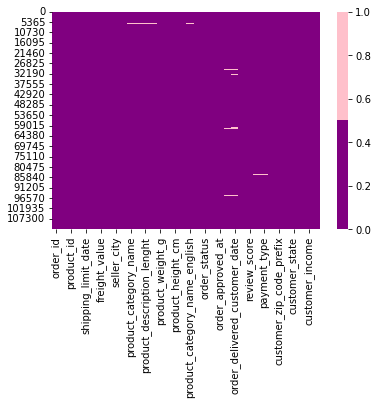

In [36]:
cols = orders_final_df.columns[:40] 
colours = ['purple', 'pink'] # purple indicates missing, purple indicates not missing.
sns.heatmap(orders_final_df[cols].isnull(), cmap=sns.color_palette(colours))

#### Calculating % of missing values in the dataset

In [37]:
for col in orders_final_df.columns:
    pct_missing = np.mean(orders_final_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

order_id - 0%
order_item_id - 0%
product_id - 0%
seller_id - 0%
shipping_limit_date - 0%
price - 0%
freight_value - 0%
seller_zip_code_prefix - 0%
seller_city - 0%
seller_state - 0%
product_category_name - 1%
product_name_lenght - 1%
product_description_lenght - 1%
product_photos_qty - 1%
product_weight_g - 0%
product_length_cm - 0%
product_height_cm - 0%
product_width_cm - 0%
product_category_name_english - 1%
customer_id - 0%
order_status - 0%
order_purchase_timestamp - 0%
order_approved_at - 0%
order_delivered_carrier_date - 1%
order_delivered_customer_date - 2%
order_estimated_delivery_date - 0%
review_score - 0%
total_payment - 0%
payment_type - 0%
customer_unique_id - 0%
customer_zip_code_prefix - 0%
customer_city - 0%
customer_state - 0%
customer_age - 0%
customer_income - 0%
customer_marital_status - 0%


#### Using Missingno library

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram.

##### 1) Matrix

<AxesSubplot:>

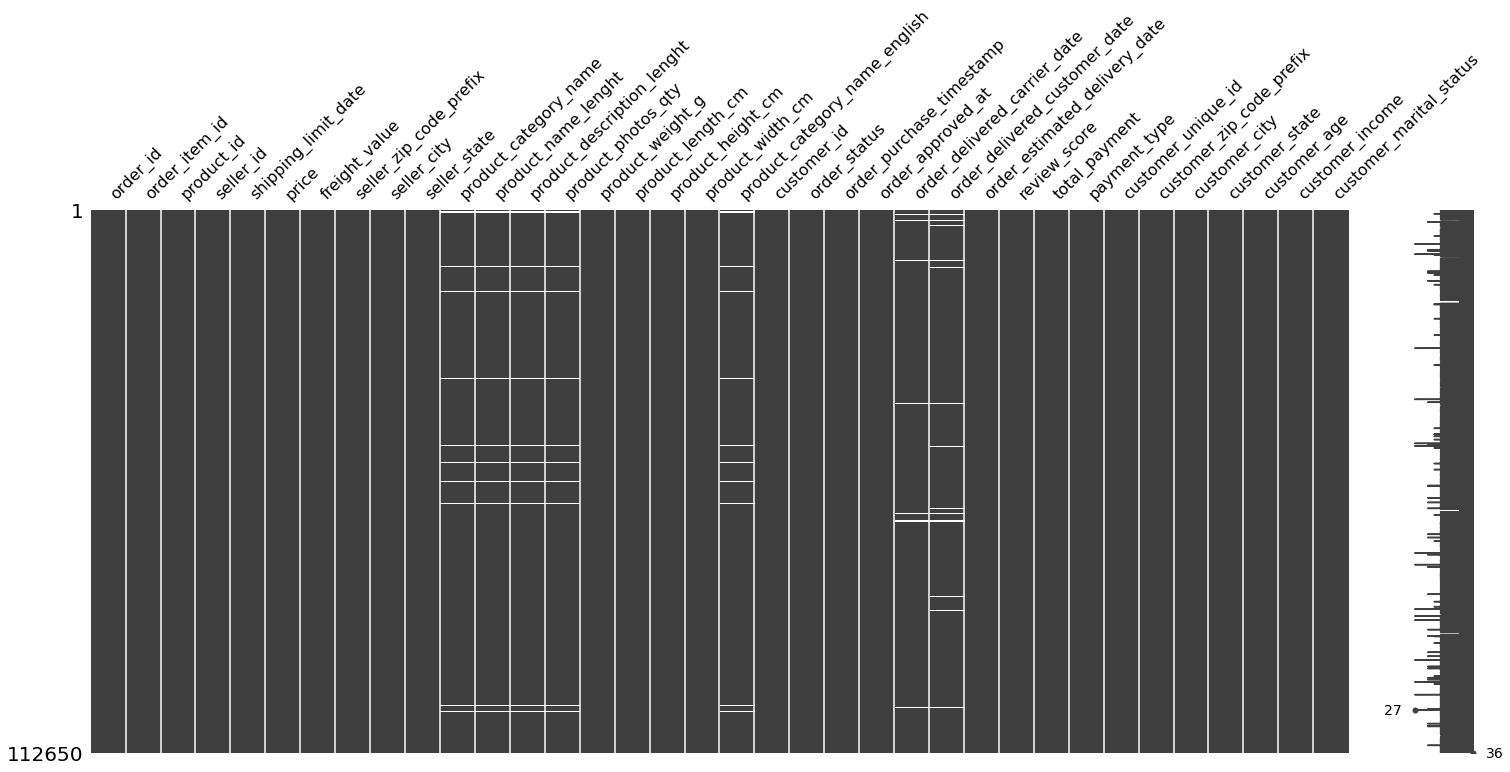

In [38]:
msno.matrix(orders_final_df)

##### 2) Bar Plot

<AxesSubplot:>

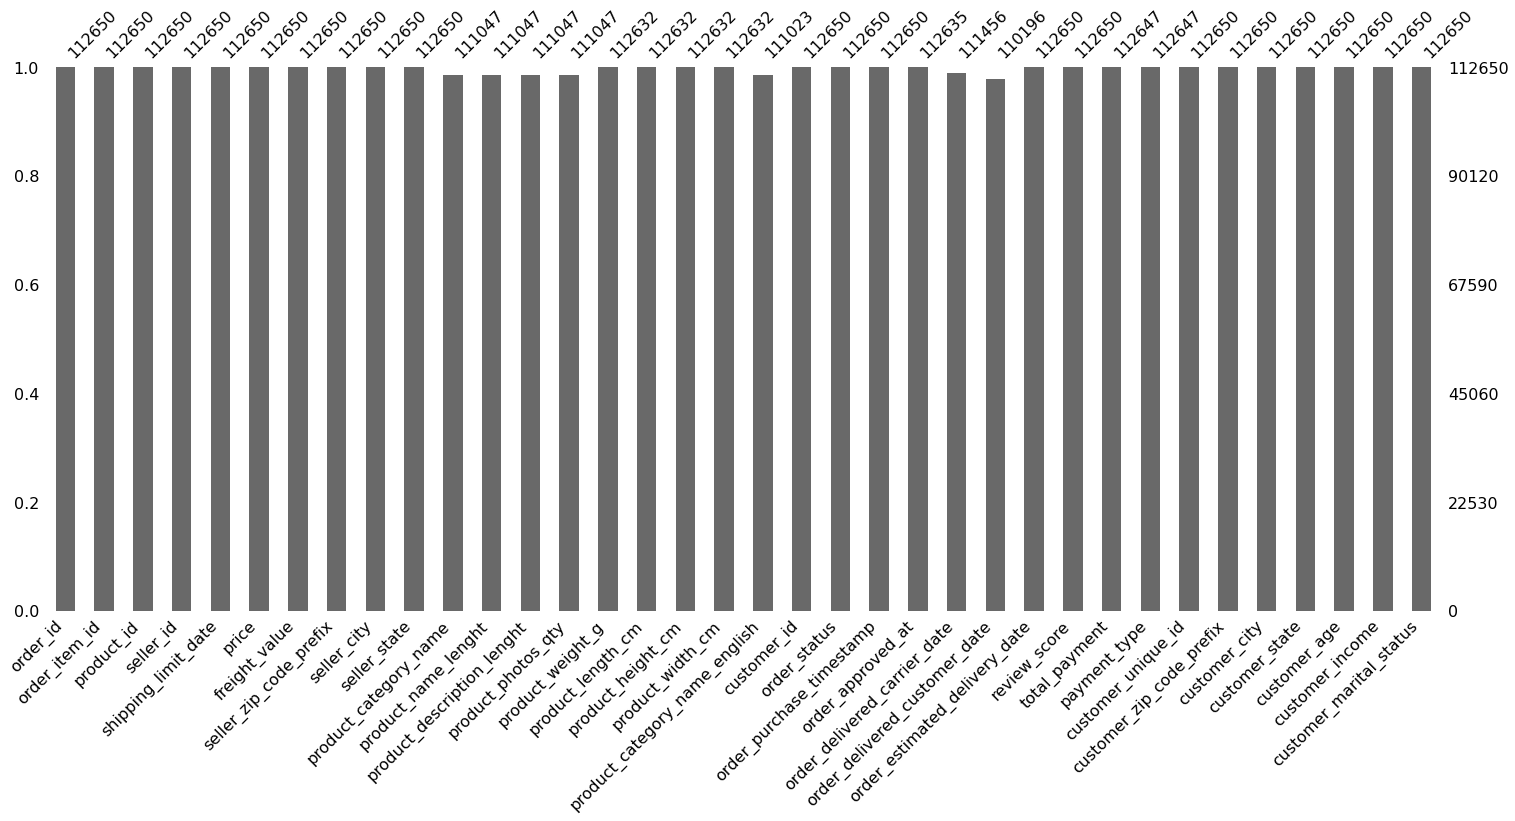

In [39]:
msno.bar(orders_final_df)

##### 3) Heatmap

<AxesSubplot:>

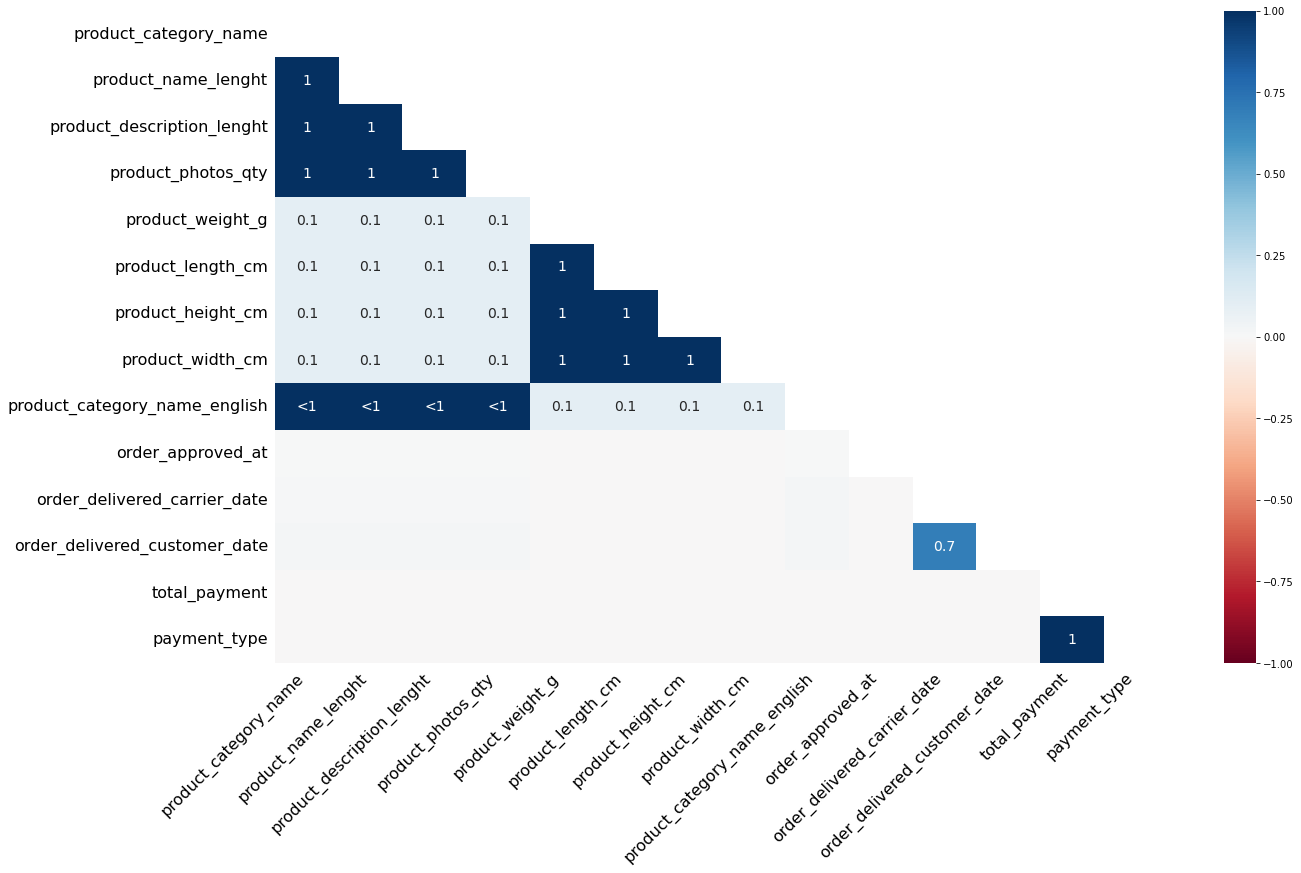

In [40]:
msno.heatmap(orders_final_df)

### Data Preprocessing and Cleaning

#### Step1: Removing columns not required

In [41]:
orders_final_df.drop(['order_delivered_carrier_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','shipping_limit_date','price','freight_value','order_approved_at','product_category_name'], axis = 1, inplace = True)
orders_final_df

,order_id,order_item_id,product_id,seller_id,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_id,order_status,...,review_score,total_payment,payment_type,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,5.0,166.04,credit_card,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,4.0,597.61,credit_card,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,5.0,498.80,credit_card,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,4.0,59.29,credit_card,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,5.0,501.49,credit_card,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,5.0,789.82,boleto,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,5.0,889.02,boleto,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,PR,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,5.0,268.76,credit_card,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,SP,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,5.0,148.83,credit_card,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0


#### Step2: Renaming columns for ease of understanding

In [42]:
orders_final_df.rename(columns={'customer_zip_code_prefix': 'customer_zip_code','seller_zip_code_prefix': 'seller_zip_code','order_purchase_timestamp': 'order_date', 'order_delivered_customer_date': 'order_delivery_date'}, inplace=True)
orders_final_df

,order_id,order_item_id,product_id,seller_id,seller_zip_code,seller_city,seller_state,product_category_name_english,customer_id,order_status,...,review_score,total_payment,payment_type,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,5.0,166.04,credit_card,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,4.0,597.61,credit_card,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,5.0,498.80,credit_card,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,4.0,59.29,credit_card,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,5.0,501.49,credit_card,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,5.0,789.82,boleto,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,5.0,889.02,boleto,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,PR,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,5.0,268.76,credit_card,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,SP,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,5.0,148.83,credit_card,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0


#### Step3: Handling null values in dataset

##### Checking count of null values in columns

In [44]:
orders_final_df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
seller_zip_code                     0
seller_city                         0
seller_state                        0
product_category_name_english    1627
customer_id                         0
order_status                        0
order_date                          0
order_delivery_date              2454
order_estimated_delivery_date       0
review_score                        0
total_payment                       3
payment_type                        3
customer_unique_id                  0
customer_zip_code                   0
customer_city                       0
customer_state                      0
customer_age                        0
customer_income                     0
customer_marital_status             0
dtype: int64

##### Method1: Dropping rows with null payment_type and total_payment
orders without payment can be ignored

In [45]:
orders_final_df = orders_final_df[orders_final_df['total_payment'].notna()]
orders_final_df = orders_final_df[orders_final_df['payment_type'].notna()]

##### Method2: Replacing null values in order_delivery_date with order_estimated_delivery_date

In [46]:
orders_final_df.order_delivery_date.fillna(orders_final_df.order_estimated_delivery_date, inplace=True)
orders_final_df

,order_id,order_item_id,product_id,seller_id,seller_zip_code,seller_city,seller_state,product_category_name_english,customer_id,order_status,...,review_score,total_payment,payment_type,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,5.0,166.04,credit_card,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,4.0,597.61,credit_card,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,5.0,498.80,credit_card,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,4.0,59.29,credit_card,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,5.0,501.49,credit_card,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,5.0,789.82,boleto,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,5.0,889.02,boleto,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,PR,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,5.0,268.76,credit_card,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,SP,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,5.0,148.83,credit_card,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0


##### Method3: Replacing null values in product_category_name_english with 'No Category'

In [47]:
orders_final_df["product_category_name_english"].fillna("No Category", inplace = True)
orders_final_df

,order_id,order_item_id,product_id,seller_id,seller_zip_code,seller_city,seller_state,product_category_name_english,customer_id,order_status,...,review_score,total_payment,payment_type,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,5.0,166.04,credit_card,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,4.0,597.61,credit_card,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,5.0,498.80,credit_card,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,4.0,59.29,credit_card,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,5.0,501.49,credit_card,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,5.0,789.82,boleto,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,5.0,889.02,boleto,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,PR,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,5.0,268.76,credit_card,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,SP,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,5.0,148.83,credit_card,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0


#### The dataset now doesn't have any more null values

In [48]:
orders_final_df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
seller_zip_code                  0
seller_city                      0
seller_state                     0
product_category_name_english    0
customer_id                      0
order_status                     0
order_date                       0
order_delivery_date              0
order_estimated_delivery_date    0
review_score                     0
total_payment                    0
payment_type                     0
customer_unique_id               0
customer_zip_code                0
customer_city                    0
customer_state                   0
customer_age                     0
customer_income                  0
customer_marital_status          0
dtype: int64

#### Step4: Handling inconsistent data and formats

##### Method1: Converting seller city and customer city into lowercase to maintain consistency

In [49]:
orders_final_df['seller_city'] = orders_final_df['seller_city'].str.lower()
orders_final_df['customer_city'] = orders_final_df['customer_city'].str.lower()
orders_final_df

,order_id,order_item_id,product_id,seller_id,seller_zip_code,seller_city,seller_state,product_category_name_english,customer_id,order_status,...,review_score,total_payment,payment_type,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_age,customer_income,customer_marital_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,5.0,166.04,credit_card,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,4.0,597.61,credit_card,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,5.0,498.80,credit_card,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,4.0,59.29,credit_card,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,5.0,501.49,credit_card,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,5.0,789.82,boleto,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,5.0,889.02,boleto,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,PR,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,5.0,268.76,credit_card,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,SP,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,5.0,148.83,credit_card,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0


##### Method2: Maintaining consistent date format

In [50]:
orders_final_df['order_date'] = pd.to_datetime(orders_final_df['order_date'], format='%Y-%m-%d')

#Adding month, year, and weekday fields for ease of visualization
orders_final_df['order_year'] = orders_final_df['order_date'].dt.year
orders_final_df['order_month'] = orders_final_df['order_date'].dt.month
orders_final_df['order_weekday'] = orders_final_df[['order_date']].apply(lambda x: dt.datetime.strftime(x['order_date'], '%A'), axis=1)

orders_final_df

,order_id,order_item_id,product_id,seller_id,seller_zip_code,seller_city,seller_state,product_category_name_english,customer_id,order_status,...,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_age,customer_income,customer_marital_status,order_year,order_month,order_weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0,2017,9,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1,2017,4,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1,2018,1,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0,2018,8,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0,2017,2,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,...,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0,2018,4,Monday
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,...,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1,2018,7,Saturday
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,PR,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,...,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1,2017,10,Monday
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,SP,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,...,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0,2017,8,Monday


### Exporting the new dataset

In [51]:
orders_final_df.to_csv("cleaned_orders_dataset.csv")

### Pandas Profiling Report
Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis of our dataset and it provides more deeper level analysis of the dataset than describe() method. This helps in visualizing and understanding the distribution of each variable in the dataset. A HTML report is generated as output in this case and we will be attaching the Pandas Profile Report in our final submission. 

In [52]:
#The profile report is ran and stored in the local drive, We'll attach the result in the email.
profile = ProfileReport(orders_final_df, title='Pandas Profiling Report', explorative=True)
profile.to_file("pandas_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]